In [102]:
h5f.close()

In [103]:
run /Users/Gonzalo/github/IC/Cities/ANASTASIA.py -c /Users/Gonzalo/github/IC/Config/ANASTASIA_default.csv

Debug level = INFO
input file = /Users/Gonzalo/github/IC/data//ISIDORA0.h5
path to database = /Users/Gonzalo/github/IC/Database/
first event = 0; last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
ZS method PMTS  = RMS CUT. Cut value = 5.0
ZS method SIPMS = FRACTION. Cut value = 0.99999
#PMTs = 12; #SiPMs = 1789; #events in DST = 100
PMT WFL = 32000; SiPM WFL = 800
Initializing NoiseSampler... 1789
OK
-->event number =0
-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
ANASTASIA has run over 9 events in 0.191843032837 seconds
Leaving ANASTASIA. Safe travels!


In [89]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
This notebook has been run last on 16/10/2016 at 17:54:19.


In [104]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/ISIDORA0.h5')
h5f

File(filename=/Users/Gonzalo/github/IC/data/ISIDORA0.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=1, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/BLR (Group) ''
/BLR/acum (EArray(10, 32000), shuffle, zlib(1)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 32000)
/BLR/baseline (EArray(10, 12), shuffle, zlib(1)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2730, 12)
/BLR/mau (EArray(100, 32000), shuffle, zlib(1)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 32000)
/BLR/pulse_on (EArray(100, 32000), shuffle, zlib(1)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 32000)
/BLR/wait_over (EArray(100, 32000), shuffle, zlib(1)) ''
  ato

In [105]:
pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM
pmtblr   = h5f.root.RD.pmtblr
pmtcwf   = h5f.root.RD.pmtcwf
pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf
pmtzswf  = h5f.root.ZS.PMT
sipmzswf = h5f.root.ZS.SiPM
pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

In [109]:
a = tbl.read_wf_table(pmttwf,0)
print(a.sum().sum(axis=1).ene_pes)

10878.0


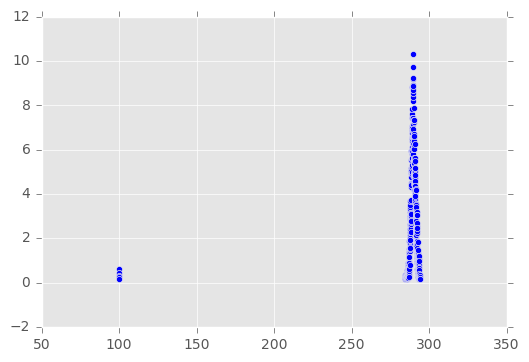

In [107]:
a = tbl.read_wf(pmtzswf,0,0)
plt.scatter(a[0],a[1])

0.39414191246
0.996021986008


9264.39974115789

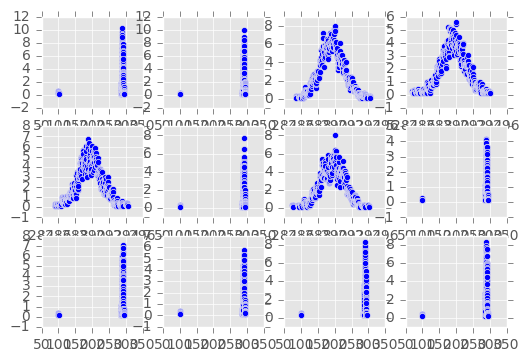

In [108]:
import time
def plot_panel( panel ):
    t0 = time.time()
    etot = 0.
    for i in panel:
        wf=  panel[i]
        plt.subplot(3,4,i+1)
        plt.scatter(wf.time_mus,wf.ene_pes)
        etot += wf.ene_pes.sum()
    print(time.time()-t0)
    return etot

t0 = time.time()
evt0 = tbl.read_wf_table(pmtzswf,0)
print(time.time()-t0)
plot_panel(evt0)

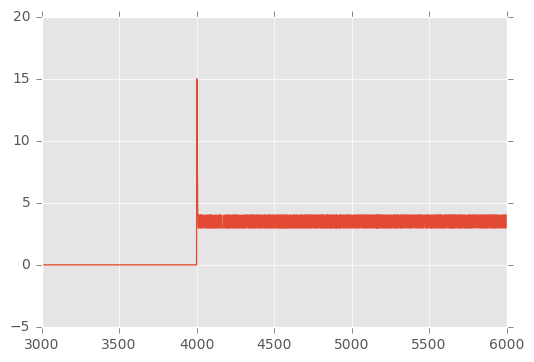

In [86]:
mpl.plts(pmtcwf[0,0],signal_start=3000,signal_end=6000,offset=5)

In [31]:
print(evt0[0])

        ene_pes    time_mus
0     -0.392725  100.025002
1     -0.654542  100.050003
2     -0.479997  100.074997
3     -0.349089  100.099998
4     -0.305453  100.125000
5     -0.218181  100.150002
6     -0.174544  100.175003
7     -0.174544  100.199997
8     -0.174544  100.224998
9     -0.174544  100.250000
10    -0.130908  100.275002
11    -0.130908  100.300003
12    -0.130908  100.324997
13    -0.174544  100.349998
14    -0.130908  100.375000
15    -0.130908  100.400002
16    -0.174544  100.425003
17    -0.174544  100.449997
18    -0.130908  100.474998
19    -0.130908  100.500000
20    -0.174544  100.525002
21    -0.130908  100.550003
22    -0.174544  100.574997
23    -0.174544  100.599998
24    -0.174544  100.625000
25    -0.130908  100.650002
26    -0.174544  100.675003
27    -0.174544  100.699997
28    -0.130908  100.724998
29    -0.174544  100.750000
...         ...         ...
27969 -0.130908  799.250000
27970 -0.130908  799.275024
27971 -0.130908  799.299988
27972 -0.130908  799

teño que:
1.- Comprobar carga pulsos
2.- PMT gordo
3.- Salvar nun ficheiro distinto
   3.1.- PMT gordo ZS (que define ventana)
   3.2.- SiPMs ZS en ventana PMT gordo
   